 # SPWC Code examples
 
 * [Basic Usage](#Basic-Usage)
     - [AMDA server](#AMDA-server)
         - [A simple example with ACE IMF data](#A-simple-example-with-ACE-IMF-data)
     - [CDAWeb server](#CDAWeb-server)
         - [A simple example with MMS1 Mag data](#A-simple-example-with-MMS1-Mag-data)
     - [SSCWeb server](#SSCWeb-server)
         - [A simple example with Moon orbit](#A-simple-example-with-Moon-orbit)
     - [SpwcVariable](#SpwcVariable)
         - [Metadata](#Metadata)
         - [Columns names](#Columns-names)
         - [Direct access to columns data](#Direct-access-to-columns-data)
         - [Direct access to time axis](#Direct-access-to-time-axis)
         - [Convert to Pandas DataFrame](#Convert-to-Pandas-DataFrame)
 * [Settings](#Settings)
     - [Local cache settings](#Local-cache-settings)
     - [Proxy server (remote cache)](#Proxy-settings)

# Basic Usage

## AMDA server

In [1]:
import spwc
%matplotlib notebook
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pds
from astropy import units

### A simple example with ACE IMF data

<IPython.core.display.Javascript object>


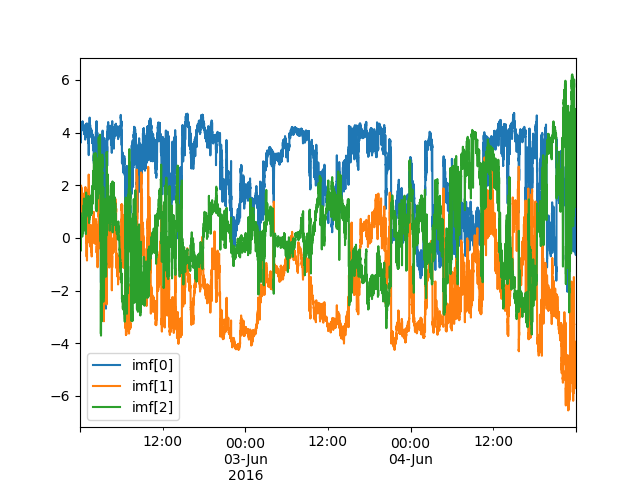

<AxesSubplot:>

In [2]:
ace_mag = spwc.get_data('amda/imf', datetime(2016,6,2), datetime(2016,6,5))
ace_mag.plot()

## CDAWeb server

In [3]:
import spwc
%matplotlib notebook
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pds
from astropy import units

### A simple example with MMS1 Mag data

<IPython.core.display.Javascript object>


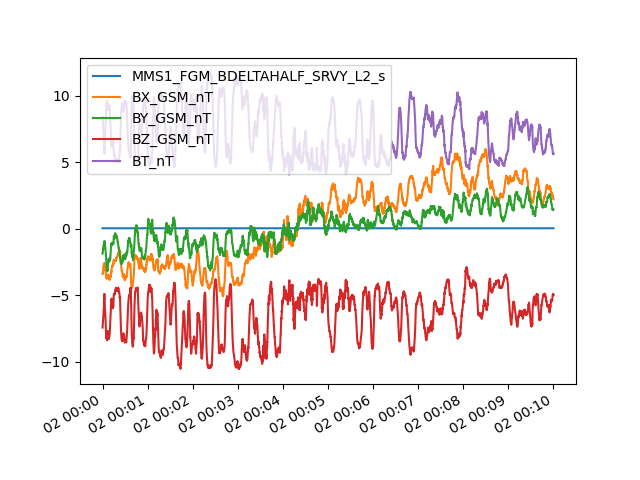

<AxesSubplot:>

In [4]:
mms1_mag = spwc.get_data('cdaweb/MMS1_FGM_SRVY_L2/mms1_fgm_b_gsm_srvy_l2_clean', 
                         datetime(2019,6,2), datetime(2019,6,2,0,10))
mms1_mag.plot()

## SSCWeb server

In [5]:
import spwc
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
import pandas as pds
import numpy as np
from astropy import units

### A simple example with Moon orbit

<IPython.core.display.Javascript object>


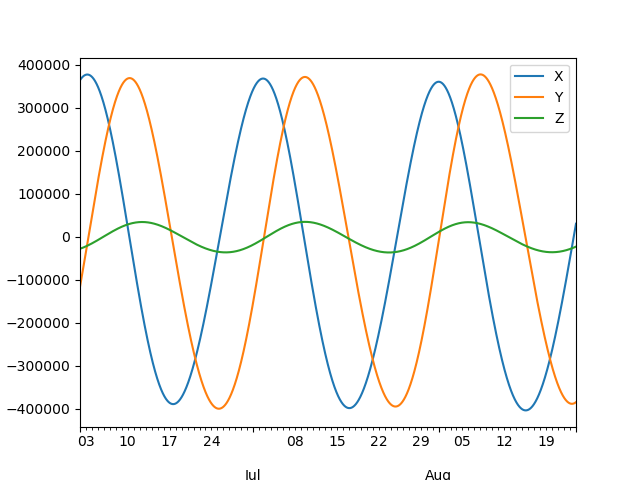

<AxesSubplot:>

In [6]:
moon_orbit = spwc.get_data('sscweb/moon', 
                         datetime(2019,6,2), datetime(2019,8,24), coordinate_system='gse')
moon_orbit.plot()

<IPython.core.display.Javascript object>


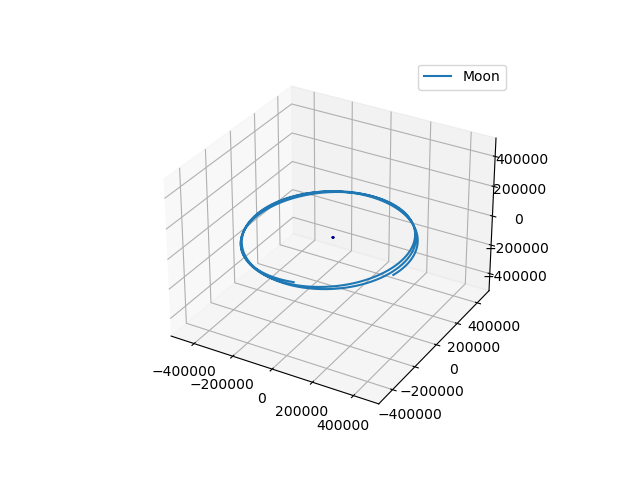

<ipython-input-8-61154edac339>:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [8]:
def plot_traj(var, ax, label):
    ax.plot(var.data[:,0],var.data[:,1],var.data[:,2], label=label)

def plot_earth(ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 6371 * np.outer(np.cos(u), np.sin(v))
    y = 6371 * np.outer(np.sin(u), np.sin(v))
    z = 6371 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b')

fig = plt.figure()
ax = fig.gca(projection='3d')
plot_traj(moon_orbit, ax, 'Moon')
plot_earth(ax)
ax.set_xlim(-50e4,50e4)
ax.set_ylim(-50e4,50e4)
ax.set_zlim(-50e4,50e4)
ax.legend()
plt.show()

### SpwcVariable

```get_data``` function returns either a **SpwcVariable** or None when there is no data.
A **SpwcVariable** is like a simplified **DataFrame** with some metadata.

#### Metadata 
usually instruments data has many metadata such as mission, units...

In [10]:
ace_mag.meta

{'AMDA INFO': '',
 'AMDA_ABOUT': 'Created by AMDA(c)',
 'AMDA_VERSION': '3.6.0',
 'AMDA_ACKNOWLEDGEMENT': 'CDPP/AMDA Team',
 'REQUEST INFO': '',
 'REQUEST_STRUCTURE': 'one-file-per-parameter-per-interval',
 'REQUEST_TIME_FORMAT': 'Seconds from 1970, milliseconds',
 'REQUEST_OUTPUT_PARAMS': 'imf',
 'BASE PARAMETERS': '',
 'MISSION_ID': 'ACE',
 'MISSION_NAME': 'ACE',
 'MISSION_DESCRIPTION': 'Advanced Composition Explorer, NASA',
 'MISSION_URL': 'http://www.srl.caltech.edu/ACE',
 'INSTRUMENT_ID': 'ACE_mag',
 'INSTRUMENT_NAME': 'MAG',
 'INSTRUMENT_DESCRIPTION': 'Magnetic Field Instrument',
 'INSTRUMENT_PI': 'spase://SMWG/Person/Norman.F.Ness',
 'INSTRUMENT_TYPE': 'Magnetometer',
 'DATASET_ID': 'ace-imf-all',
 'DATASET_NAME': 'final / prelim',
 'DATASET_DESCRIPTION': 'Interplanetary Magnetic Field 16-sec Level2/PRELIM Data',
 'DATASET_SOURCE': 'CDPP/DDServer',
 'DATASET_GLOBAL_START': '1997-09-02T00:00:12.000',
 'DATASET_GLOBAL_STOP': '2021-04-03T23:59:58.000',
 'DATASET_MIN_SAMPLING': '16'

For example you can take advantage of [Astropy units](https://docs.astropy.org/en/stable/units/index.html) module to set units:

In [11]:
ace_mag.data * units.Unit(ace_mag.meta['PARAMETER_UNITS'])

<Quantity [[ 4.036,  0.928,  0.47 ],
           [ 4.072,  0.924,  0.422],
           [ 4.113,  0.948,  0.506],
           ...,
           [-0.432, -4.771,  2.997],
           [-0.262, -5.059,  2.512],
           [-0.152, -5.143,  2.354]] nT>

#### Columns names

In [12]:
ace_mag.columns

['imf[0]', 'imf[1]', 'imf[2]']

#### Direct access to columns data

In [13]:
ace_mag.data

array([[ 4.036,  0.928,  0.47 ],
       [ 4.072,  0.924,  0.422],
       [ 4.113,  0.948,  0.506],
       ...,
       [-0.432, -4.771,  2.997],
       [-0.262, -5.059,  2.512],
       [-0.152, -5.143,  2.354]])

#### Direct access to time axis

In [14]:
ace_mag.time

array([1.46482562e+09, 1.46482563e+09, 1.46482565e+09, ...,
       1.46508477e+09, 1.46508478e+09, 1.46508480e+09])

Note that by default time axis is using epoch representation, you can simply convert it to datetime64 like this:

In [15]:
pds.to_datetime(ace_mag.time, unit='s')

DatetimeIndex(['2016-06-02 00:00:15', '2016-06-02 00:00:31',
               '2016-06-02 00:00:47', '2016-06-02 00:01:03',
               '2016-06-02 00:01:19', '2016-06-02 00:01:35',
               '2016-06-02 00:01:51', '2016-06-02 00:02:07',
               '2016-06-02 00:02:23', '2016-06-02 00:02:39',
               ...
               '2016-06-04 23:57:35', '2016-06-04 23:57:51',
               '2016-06-04 23:58:07', '2016-06-04 23:58:23',
               '2016-06-04 23:58:39', '2016-06-04 23:58:55',
               '2016-06-04 23:59:11', '2016-06-04 23:59:27',
               '2016-06-04 23:59:43', '2016-06-04 23:59:59'],
              dtype='datetime64[ns]', length=16200, freq=None)

#### Convert to Pandas DataFrame

In [16]:
df=ace_mag.to_dataframe(datetime_index=True) # use datetime_index=True to convert index from epoch to datetime
df.head()

,imf[0],imf[1],imf[2]
2016-06-02 00:00:15,4.036,0.928,0.470
2016-06-02 00:00:31,4.072,0.924,0.422
2016-06-02 00:00:47,4.113,0.948,0.506
2016-06-02 00:01:03,4.092,0.996,0.466
2016-06-02 00:01:19,4.156,1.031,0.359


# Settings

## Local cache settings

By default SPWC stores requests results on user's disk, to get current cache location use:

In [17]:
spwc.config.cache_path.get()

'/home/jeandet/.cache/spwc'

You can also get current cache max size with:

In [18]:
spwc.config.cache_size.get()

'20e9'

When SPWC has downloaded more data this value, it will drop least recently used data.

Cache path and cache size can be changed/set with:
```python
spwc.config.cache_path.set('/some/path')
spwc.config.cache_size.get(1e8)
```

## Proxy settings
**Use SciQLop remote cache to speed up data access**

SPWC, can take advantage of [SciQLop](http://sciqlop.lpp.polytechnique.fr/) shared proxy server. [This server](http://sciqlop.lpp.polytechnique.fr/cache) act as a cache between remote servers such as [cdaweb](https://cdaweb.gsfc.nasa.gov/index.html/) or [amda](http://amda.irap.omp.eu/) and spwc. It stores data from previous requests in an efficient cache to reduce both latency and total download time. This means you benefit from other users previous requests.

- Note that SPWC has also it's own local cache. Once you got data from either a remote server or SciQLop cache, you won't need to download anymore the same data unless a new version is available or it has been discarded because your local cache was full.

In [19]:
spwc.config.proxy_url.set('http://sciqlop.lpp.polytechnique.fr/cache')
spwc.config.proxy_enabled.set('True')

This means that with a big enough local cache, you don't have to care if you saved your previous requests results.
Just work as if you always get data from remote server, SPWC will take care of everything else.

In [20]:
%timeit spwc.get_data('amda/imf', datetime(2016,6,2), datetime(2016,6,5), disable_cache=True)

10.2 ms ± 212 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit spwc.get_data('amda/imf', datetime(2016,6,2), datetime(2016,6,5), disable_cache=False)

1.09 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Space Objects trajectories

More FUN with SSCWeb:

In [22]:
start_time = datetime(2019,5,1)
stop_time = datetime(2019,6,1)
moon = spwc.get_orbit('moon', start_time, stop_time, coordinate_system='gse')
themis_a = spwc.get_orbit('themisa',  start_time, stop_time, coordinate_system='gse')
themis_b = spwc.get_orbit('themisb',  start_time, stop_time, coordinate_system='gse')
mms_1 = spwc.get_orbit('mms1',  start_time, stop_time, coordinate_system='gse')
cluster_1 = spwc.get_orbit('cluster1',  start_time, stop_time, coordinate_system='gse')

In [23]:
pds.to_datetime(np.min(moon.time), unit='s'),pds.to_datetime(np.min(mms_1.time), unit='s')

(Timestamp('2019-05-01 00:00:00'), Timestamp('2019-05-01 00:00:30'))

<IPython.core.display.Javascript object>


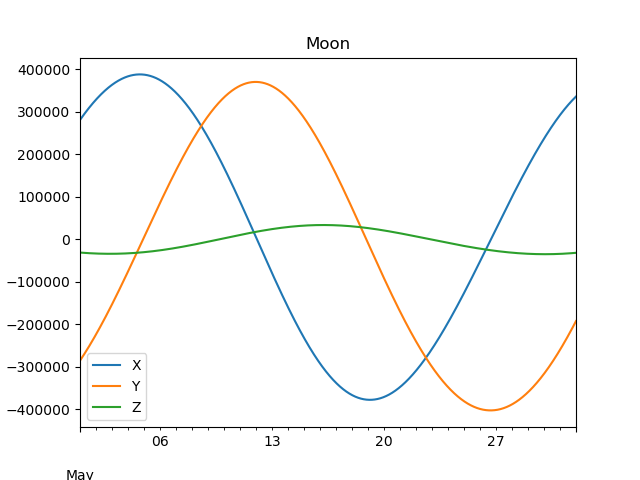

<IPython.core.display.Javascript object>


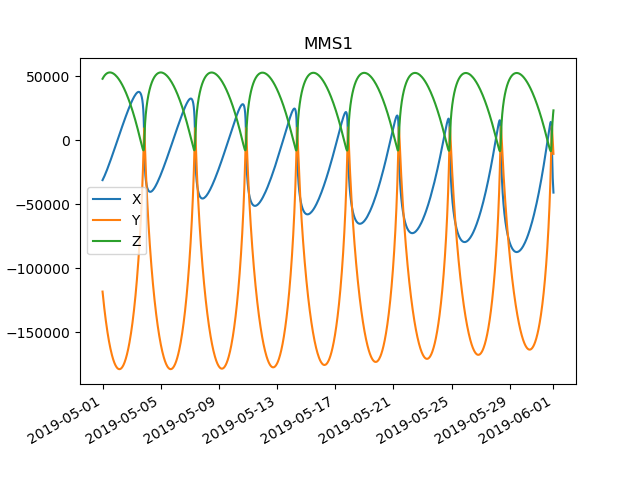

<IPython.core.display.Javascript object>


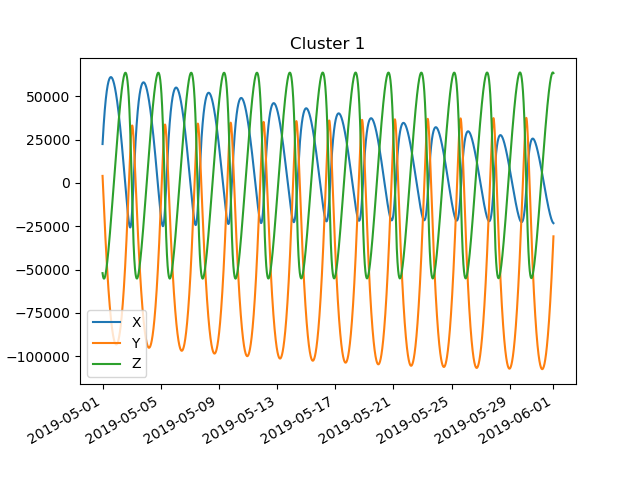

<IPython.core.display.Javascript object>


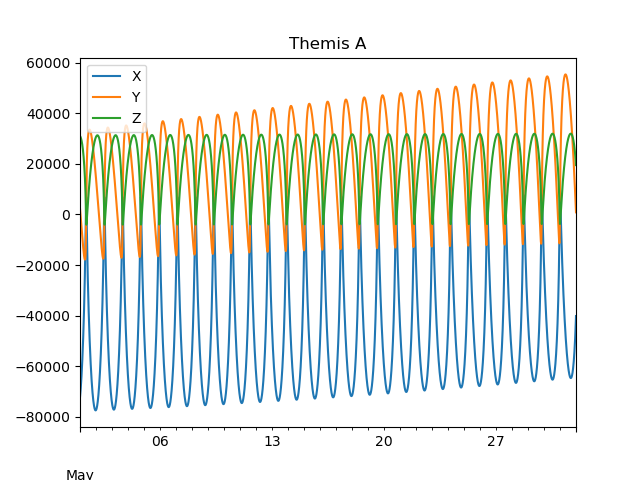

<AxesSubplot:title={'center':'Themis A'}>

In [24]:
moon.plot(title='Moon')
mms_1.plot(title='MMS1')
cluster_1.plot(title='Cluster 1')
themis_a.plot(title='Themis A')

<IPython.core.display.Javascript object>


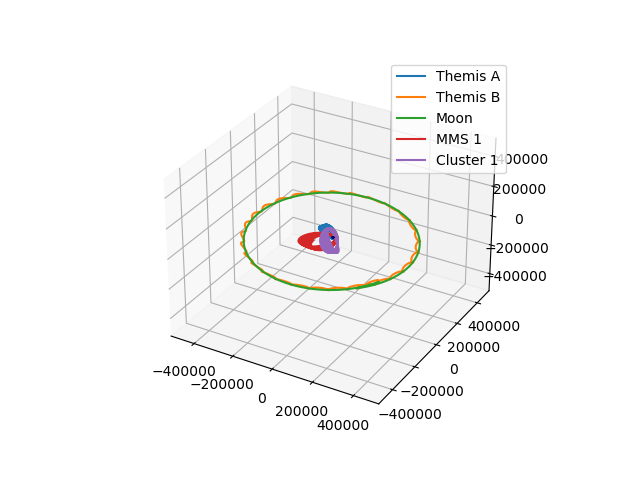

<ipython-input-25-b0ce3c0f0220>:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [25]:
def plot_traj(var, ax, label):
    ax.plot(var.data[:,0],var.data[:,1],var.data[:,2], label=label)

def plot_earth(ax):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 6371 * np.outer(np.cos(u), np.sin(v))
    y = 6371 * np.outer(np.sin(u), np.sin(v))
    z = 6371 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b')

fig = plt.figure()
ax = fig.gca(projection='3d')
plot_traj(themis_a, ax, 'Themis A')
plot_traj(themis_b, ax, 'Themis B')
plot_traj(moon, ax, 'Moon')
plot_traj(mms_1, ax, 'MMS 1')
plot_traj(cluster_1, ax, 'Cluster 1')
plot_earth(ax)
ax.set_xlim(-50e4,50e4)
ax.set_ylim(-50e4,50e4)
ax.set_zlim(-50e4,50e4)
ax.legend()
plt.show()

## [broni](https://github.com/SciQLop/broni)

SPWC is compatible with [broni](https://github.com/SciQLop/broni), a trajectory/object intersection package.

## Available object list from **sscweb**:

In [26]:
observatories = spwc.ssc.get_observatories()
[ (obs['Name'],obs['Id']) for obs in observatories ]

[('ACE', 'ace'),
 ('Active', 'active'),
 ('AE-C', 'aec'),
 ('AE-D', 'aed'),
 ('AE-E', 'aee'),
 ('AEROCUBE-6A', 'aerocube6a'),
 ('AEROCUBE-6B', 'aerocube6b'),
 ('AIM', 'aim'),
 ('Akebono', 'akebono'),
 ('Alouette-1', 'alouette1'),
 ('Alouette-2', 'alouette2'),
 ('APEX-MAIN', 'apex'),
 ('Aqua', 'aqua'),
 ('Arase (ERG)', 'arase'),
 ('Arase (ERG, 1-year Predict)', 'arasepred'),
 ('ARIEL-4', 'ariel4'),
 ('ARTEMIS_P1', 'artemisp1'),
 ('ARTEMIS_P1 (6-year Predict)', 'artemisp1pred'),
 ('ARTEMIS_P2', 'artemisp2'),
 ('ARTEMIS_P2 (6-year Predict)', 'artemisp2pred'),
 ('ASTRID II', 'astrid2'),
 ('Aura', 'aura'),
 ('BARREL-1A', 'barrel1a'),
 ('BARREL-1B', 'barrel1b'),
 ('BARREL-1C', 'barrel1c'),
 ('BARREL-1D', 'barrel1d'),
 ('BARREL-1G', 'barrel1g'),
 ('BARREL-1H', 'barrel1h'),
 ('BARREL-1I', 'barrel1i'),
 ('BARREL-1J', 'barrel1j'),
 ('BARREL-1K', 'barrel1k'),
 ('BARREL-1M', 'barrel1m'),
 ('BARREL-1O', 'barrel1o'),
 ('BARREL-1Q', 'barrel1q'),
 ('BARREL-1R', 'barrel1r'),
 ('BARREL-1S', 'barrel1s'),